# Pandas (продолжение)

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Упражнение 1

Найдите и выведи индексы пропущенных значений.
Заполните пропущеные значения следующими способами: 

1) Среднимим значения 
2) Медианными значениями 
3) Наиболее часто встечающимися 
4) Линейной интерполяцией 

In [4]:
df = pd.DataFrame({
'ord_no': [70001, np.nan, 70002, 70004, np.nan, 70005, np.nan, 70010, 70003, 70012, np.nan, 70013],
'purch_amt': [150.5, np.nan, 65.26, 110.5, 948.5, np.nan, 5760, 1983.43, np.nan, 250.45, 75.29, 3045.6],
'sale_amt': [10.5, 20.65, np.nan, 11.5, 98.5, np.nan, 57, 19.43, np.nan, 25.45, 75.29, 35.6],
'ord_date': ['2012-10-05', '2012-09-10', np.nan, '2012-08-17', '2012-09-10', '2012-07-27', '2012-09-10', '2012-10-10', '2012-10-10', '2012-06-27', '2012-08-17', '2012-04-25'],
'customer_id': [3002, 3001, 3001, 3003, 3002, 3001, 3001, 3004, 3003, 3002, 3001, 3001],
'salesman_id': [5002, 5003, 5001,np.nan, 5002, 5001, 5001,np.nan, 5003, 5002, 5003,np.nan]})

df["ord_date"] = pd.to_datetime(df["ord_date"])

df[["ord_date","purch_amt"]].index.values
df

,ord_no,purch_amt,sale_amt,ord_date,customer_id,salesman_id
0,70001.0,150.50,10.50,2012-10-05,3002,5002.0
1,NaN,NaN,20.65,2012-09-10,3001,5003.0
2,70002.0,65.26,NaN,NaT,3001,5001.0
3,70004.0,110.50,11.50,2012-08-17,3003,NaN
4,NaN,948.50,98.50,2012-09-10,3002,5002.0
5,70005.0,NaN,NaN,2012-07-27,3001,5001.0
6,NaN,5760.00,57.00,2012-09-10,3001,5001.0
7,70010.0,1983.43,19.43,2012-10-10,3004,NaN
8,70003.0,NaN,NaN,2012-10-10,3003,5003.0
9,70012.0,250.45,25.45,2012-06-27,3002,5002.0


In [5]:
df.fillna(df.mean())

C:\Users\HP\AppData\Local\Temp\ipykernel_1744\3020038484.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.fillna(df.mean())


,ord_no,purch_amt,sale_amt,ord_date,customer_id,salesman_id
0,70001.00,150.500000,10.500000,2012-10-05,3002,5002.0
1,70006.25,1376.614444,20.650000,2012-09-10,3001,5003.0
2,70002.00,65.260000,39.324444,NaT,3001,5001.0
3,70004.00,110.500000,11.500000,2012-08-17,3003,5002.0
4,70006.25,948.500000,98.500000,2012-09-10,3002,5002.0
5,70005.00,1376.614444,39.324444,2012-07-27,3001,5001.0
6,70006.25,5760.000000,57.000000,2012-09-10,3001,5001.0
7,70010.00,1983.430000,19.430000,2012-10-10,3004,5002.0
8,70003.00,1376.614444,39.324444,2012-10-10,3003,5003.0
9,70012.00,250.450000,25.450000,2012-06-27,3002,5002.0


In [6]:
for column in df.columns:
    mask = pd.isnull(df[column])
    print(column, df[mask].index.values)


ord_no [ 1  4  6 10]
purch_amt [1 5 8]
sale_amt [2 5 8]
ord_date [2]
customer_id []
salesman_id [ 3  7 11]


In [7]:
df.fillna(df.median())

C:\Users\HP\AppData\Local\Temp\ipykernel_1744\652313308.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.fillna(df.median())


,ord_no,purch_amt,sale_amt,ord_date,customer_id,salesman_id
0,70001.0,150.50,10.50,2012-10-05,3002,5002.0
1,70004.5,250.45,20.65,2012-09-10,3001,5003.0
2,70002.0,65.26,25.45,NaT,3001,5001.0
3,70004.0,110.50,11.50,2012-08-17,3003,5002.0
4,70004.5,948.50,98.50,2012-09-10,3002,5002.0
5,70005.0,250.45,25.45,2012-07-27,3001,5001.0
6,70004.5,5760.00,57.00,2012-09-10,3001,5001.0
7,70010.0,1983.43,19.43,2012-10-10,3004,5002.0
8,70003.0,250.45,25.45,2012-10-10,3003,5003.0
9,70012.0,250.45,25.45,2012-06-27,3002,5002.0


In [8]:
df.fillna(df.mode().iloc[0])

,ord_no,purch_amt,sale_amt,ord_date,customer_id,salesman_id
0,70001.0,150.50,10.50,2012-10-05,3002,5002.0
1,70001.0,65.26,20.65,2012-09-10,3001,5003.0
2,70002.0,65.26,10.50,2012-09-10,3001,5001.0
3,70004.0,110.50,11.50,2012-08-17,3003,5001.0
4,70001.0,948.50,98.50,2012-09-10,3002,5002.0
5,70005.0,65.26,10.50,2012-07-27,3001,5001.0
6,70001.0,5760.00,57.00,2012-09-10,3001,5001.0
7,70010.0,1983.43,19.43,2012-10-10,3004,5001.0
8,70003.0,65.26,10.50,2012-10-10,3003,5003.0
9,70012.0,250.45,25.45,2012-06-27,3002,5002.0


In [9]:
df.fillna(df[["ord_no","purch_amt", "sale_amt", "customer_id", "salesman_id"]].interpolate())

,ord_no,purch_amt,sale_amt,ord_date,customer_id,salesman_id
0,70001.0,150.50,10.500,2012-10-05 00:00:00,3002,5002.0
1,70001.5,107.88,20.650,2012-09-10 00:00:00,3001,5003.0
2,70002.0,65.26,16.075,NaN,3001,5001.0
3,70004.0,110.50,11.500,2012-08-17 00:00:00,3003,5001.5
4,70004.5,948.50,98.500,2012-09-10 00:00:00,3002,5002.0
5,70005.0,3354.25,77.750,2012-07-27 00:00:00,3001,5001.0
6,70007.5,5760.00,57.000,2012-09-10 00:00:00,3001,5001.0
7,70010.0,1983.43,19.430,2012-10-10 00:00:00,3004,5002.0
8,70003.0,1116.94,22.440,2012-10-10 00:00:00,3003,5003.0
9,70012.0,250.45,25.450,2012-06-27 00:00:00,3002,5002.0


In [10]:
pd.isnull(df["ord_no"])
mask = pd.isnull(df["ord_no"])
df[mask]

,ord_no,purch_amt,sale_amt,ord_date,customer_id,salesman_id
1,NaN,NaN,20.65,2012-09-10,3001,5003.0
4,NaN,948.50,98.50,2012-09-10,3002,5002.0
6,NaN,5760.00,57.00,2012-09-10,3001,5001.0
10,NaN,75.29,75.29,2012-08-17,3001,5003.0


In [11]:
mask = pd.isnull(df["ord_no"])
df[mask]["ord_no"] = df["ord_no"].mean()
df["ord_no"].fillna(df["ord_no"].mean(), inplace=True)

df

C:\Users\HP\AppData\Local\Temp\ipykernel_1744\4268039953.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[mask]["ord_no"] = df["ord_no"].mean()


,ord_no,purch_amt,sale_amt,ord_date,customer_id,salesman_id
0,70001.00,150.50,10.50,2012-10-05,3002,5002.0
1,70006.25,NaN,20.65,2012-09-10,3001,5003.0
2,70002.00,65.26,NaN,NaT,3001,5001.0
3,70004.00,110.50,11.50,2012-08-17,3003,NaN
4,70006.25,948.50,98.50,2012-09-10,3002,5002.0
5,70005.00,NaN,NaN,2012-07-27,3001,5001.0
6,70006.25,5760.00,57.00,2012-09-10,3001,5001.0
7,70010.00,1983.43,19.43,2012-10-10,3004,NaN
8,70003.00,NaN,NaN,2012-10-10,3003,5003.0
9,70012.00,250.45,25.45,2012-06-27,3002,5002.0


## Упражнение 2


DataFrame дан ниже


1. Найдите все алмазы которые по любому линейному размеру больше 5.

2. Создайте новый DataFrame в которому исключены все не чсиловые столбы исходного DataFrame. 

3. Расчитатйте средние значения для каждого столбца

4. Пострйоет график средних цен для каждой категории (cut) алмазов.

5. Постройте гистрограмму  веса ('carat') алмазов.

6. Посчитаете все пропущенные занчения в Dataframe

7. Создайте новый DataFrame в которому исключены все строки с пропущенными занчениями

8. Узнайте реальное использование оперативной памяти вашим DataFrame

9. Напишите функцию возращающую 20 случайныз строчек из DataFrame (без повторений)

In [12]:
import pandas as pd
diamonds = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv')

diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [16]:
razmer = ((diamonds["x"]>5)|(diamonds["y"]>5)|(diamonds["z"]>5))
diamonds[razmer]
#1

,carat,cut,color,clarity,depth,table,price,x,y,z
90,0.70,Ideal,E,SI1,62.5,57.0,2757,5.70,5.72,3.57
91,0.86,Fair,E,SI2,55.1,69.0,2757,6.45,6.33,3.52
92,0.70,Ideal,G,VS2,61.6,56.0,2757,5.70,5.67,3.50
93,0.71,Very Good,E,VS2,62.4,57.0,2759,5.68,5.73,3.56
94,0.78,Very Good,G,SI2,63.8,56.0,2759,5.81,5.85,3.72
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [18]:
chisl = diamonds.select_dtypes(include=['int64','float64'])
chisl
#2

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [19]:
#3
chisl.mean()

carat       0.797940
depth      61.749405
table      57.457184
price    3932.799722
x           5.731157
y           5.734526
z           3.538734
dtype: float64

<AxesSubplot: xlabel='cut'>

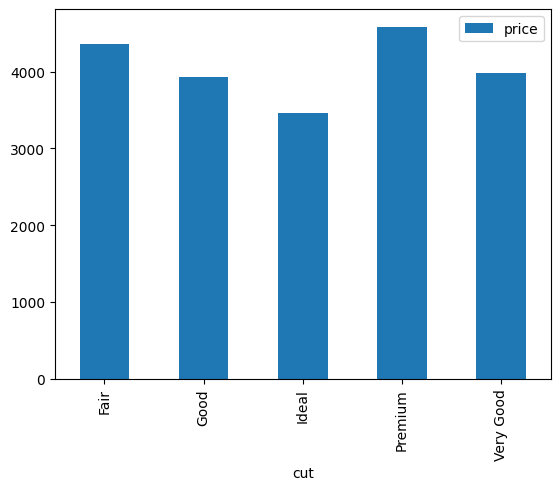

In [14]:
#4
result = diamonds.groupby(["cut"]).agg({"price":"mean"})
result.plot(kind = "bar")

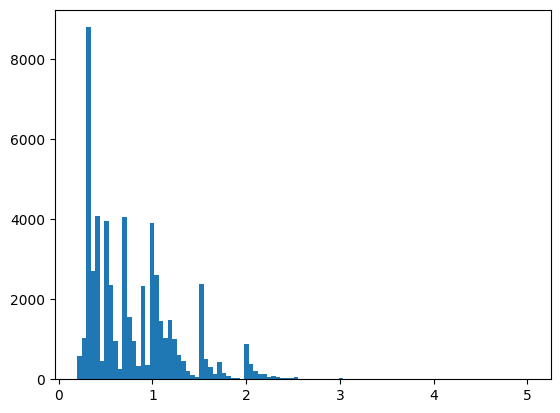

In [34]:
#5
plt.hist(diamonds['carat'], bins = 100)
plt.show()

In [35]:
#6
pd.isna(diamonds).sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [37]:
#7
no_nulls = diamonds[diamonds.isnull() == False]
no_nulls

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [39]:
#8
diamonds.memory_usage()
#diamonds.memory_usage().sum()

Index         128
carat      431520
cut        431520
color      431520
clarity    431520
depth      431520
table      431520
price      431520
x          431520
y          431520
z          431520
dtype: int64

In [40]:
#8
diamonds.memory_usage().sum()

4315328

In [47]:
#9
import random
def random_20_str(x):
    index = np.sort(random.sample(range(len(diamonds)), 20))
    return diamonds.iloc[index]
random_20_str(diamonds)

,carat,cut,color,clarity,depth,table,price,x,y,z
1428,0.81,Premium,H,VS1,62.6,58.0,2972,5.96,5.90,3.71
3186,0.71,Ideal,E,VS2,61.1,56.0,3342,5.77,5.79,3.53
7498,0.70,Very Good,E,VVS2,61.7,57.0,4240,5.68,5.71,3.51
12352,1.04,Ideal,I,VS1,61.8,56.0,5229,6.49,6.51,4.02
12425,1.02,Premium,H,VS2,61.8,58.0,5241,6.49,6.43,3.99
12819,1.01,Ideal,F,SI1,60.9,55.0,5345,6.50,6.48,3.95
18963,1.29,Premium,H,VS2,60.7,61.0,7802,7.10,7.01,4.28
20497,1.24,Ideal,G,VS1,61.5,56.0,8830,6.92,6.97,4.27
24655,1.70,Ideal,I,VS1,61.9,55.0,12996,7.65,7.72,4.75
26381,2.08,Premium,E,SI2,62.3,59.0,15873,8.22,8.16,5.10


## Упражнение 3
##### ~определенно не баян~ classic

Наконец-то, пришло время взяться за настоящий дата инжениринг и дата саенс. Датасет [титаник](https://www.kaggle.com/c/titanic).

1. Найдите два отдельных распределения по классам и возрастам пассажиров Титаника.
2. Разделите на две возрастные группы такие, что в них входят одинаковое количество пассажиров определенного класса. Определить такие группы для каждого пола (male/female)
3. На основе полученных групп определите доли выживших. (должно получится 12 чисел)
4. Найдите средний возраст выжившего для каждого из полов на основе полного набора данных
5. Найдите несмещенное среднеквадратическое отклонение возраста для выживших
6. Постройте график зависимости доли выживаемости от возроста
7. Постройте куммулятивный график выживаемости в зависимости от возраста для разных полов
8. Определите общие расходы пассажиров
9. Средих всех пассажиров найдите Екатерин (`Kate`, `Katerina`, `Ekaterina` ...)
10. `*`Определите имена для мужчин и женщин, которые чаще остальных встречались на корабле. Выведите список первых пяти.

In [48]:
import pandas as pd

titanic = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv")

titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [49]:
#1
titanic.groupby(["pclass"]).agg("count")

,survived,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
pclass,,,,,,,,,,,,,,
1,216,216,186,216,216,216,214,216,216,216,175,214,216,216
2,184,184,173,184,184,184,184,184,184,184,16,184,184,184
3,491,491,355,491,491,491,491,491,491,491,12,491,491,491


In [50]:
#1
titanic.groupby(["age"]).agg("count")

,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
age,,,,,,,,,,,,,,
0.42,1,1,1,1,1,1,1,1,1,1,0,1,1,1
0.67,1,1,1,1,1,1,1,1,1,1,0,1,1,1
0.75,2,2,2,2,2,2,2,2,2,2,0,2,2,2
0.83,2,2,2,2,2,2,2,2,2,2,0,2,2,2
0.92,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70.00,2,2,2,2,2,2,2,2,2,2,1,2,2,2
70.50,1,1,1,1,1,1,1,1,1,1,0,1,1,1
71.00,2,2,2,2,2,2,2,2,2,2,1,2,2,2


In [71]:
#2 Разделите на две возрастные группы такие, что в них входят одинаковое количество пассажиров определенного класса. Определить такие группы для каждого пола (male/female)
def group(pclass, sex):
    sort = titanic[(titanic['pclass']==pclass)&(titanic['sex']==sex)].sort_values(by="age", ascending = False)
    first = sort[:len(sort)//2]
    second = sort[len(sort)//2:]
    return first, second


for pclass in range(1, 4):
    for sex in ['male', 'female']:
        print(group(pclass, sex))

(     survived  pclass   sex   age  sibsp  parch      fare embarked  class  \
630         1       1  male  80.0      0      0   30.0000        S  First   
96          0       1  male  71.0      0      0   34.6542        C  First   
493         0       1  male  71.0      0      0   49.5042        C  First   
745         0       1  male  70.0      1      1   71.0000        S  First   
456         0       1  male  65.0      0      0   26.5500        S  First   
..        ...     ...   ...   ...    ...    ...       ...      ...    ...   
822         0       1  male  38.0      0      0    0.0000        S  First   
248         1       1  male  37.0      1      1   52.5542        S  First   
273         0       1  male  37.0      0      1   29.7000        C  First   
137         0       1  male  37.0      1      0   53.1000        S  First   
679         1       1  male  36.0      0      1  512.3292        C  First   

     who  adult_male deck  embark_town alive  alone  
630  man        True

In [74]:
#3 На основе полученных групп определите доли выживших. (должно получится 12 чисел)

mo1, my1 = group(1, 'male')
mo2, my2 = group(2, 'male')
mo3, my3 = group(3, 'male')
fo1, fy1 = group(1, 'female')
fo2, fy2 = group(2, 'female')
fo3, fy3 = group(3, 'female')

survived = pd.DataFrame({"male younger": [my1['survived'].mean(), my2['survived'].mean() , my3['survived'].mean()],
"male older": [mo1['survived'].mean(), mo2['survived'].mean() , mo3['survived'].mean()],
"female younger": [fy1['survived'].mean(), fy2['survived'].mean() , fy3['survived'].mean()],
"female older": [fo1['survived'].mean(), fo2['survived'].mean() , fo3['survived'].mean()]}, index = ["1", "2", "3"])
print(survived)

   male younger  male older  female younger  female older
1      0.509804    0.280000        0.953488      0.976190
2      0.200000    0.102041        0.918919      0.918919
3      0.157480    0.142857        0.490196      0.431373


In [78]:
#4 Найдите средний возраст выжившего для каждого из полов на основе полного набора данных
females = titanic[(titanic['sex']=='female')&(titanic['survived']==1)].agg({'age': 'mean'})[0]
males = titanic[(titanic['sex']=='male')&(titanic['survived']==1)].agg({'age': 'mean'})[0]

print("females: ", females, "males: ", males)

females:  28.84771573604061 males:  27.276021505376345


In [79]:
# 5 Найдите несмещенное среднеквадратическое отклонение возраста для выживших
titanic[titanic['survived']==1]['age'].std()

14.950951984140428

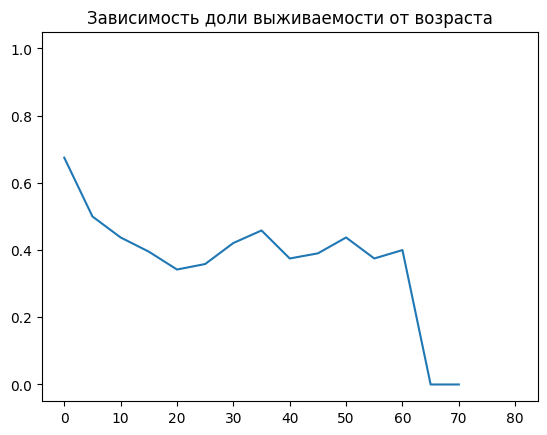

In [82]:
#6 Постройте график зависимости доли выживаемости от возроста
x=[]
y=[]
for i in range(20):
    x.append(i*5)
    y.append(titanic[(titanic['age']>=5*i)&(titanic['age']<5*(i+1))].agg({'survived': 'mean'})[0])
plt.title("Зависимость доли выживаемости от возраста")
plt.plot(x,y)
plt.show()

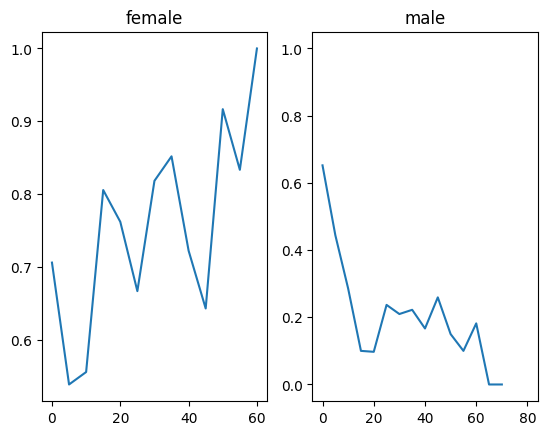

In [84]:
#7 Постройте куммулятивный график выживаемости в зависимости от возраста для разных полов
xfemale=[]
yfemale=[]
for i in range(20):
    yfemale.append(titanic[(titanic['age']>=5*i)&(titanic['age']<5*(i+1))&(titanic['sex']=='female')].agg({'survived': 'mean'})[0])
    xfemale.append(i*5)
xmale=[]
ymale=[]
for i in range(20):
    ymale.append(titanic[(titanic['age']>=5*i)&(titanic['age']<5*(i+1))&(titanic['sex']=='male')].agg({'survived': 'mean'})[0])
    xmale.append(i*5)

f, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(xfemale, yfemale)
ax1.set_title('female')
ax2.plot(xmale, ymale)
ax2.set_title('male')
plt.show()

In [85]:
#8 Определите общие расходы пассажиров
general_charges = titanic["fare"].sum()
general_charges

28693.9493